In [3]:
import pandas as pd
import networkx as nx
import random
import math

Метрика, которую будем использовать для сравнения похожести графов:

In [51]:
def metrica(el_1, el_2):
    res = (min(el_1, (el_1+el_2)/ 2)) / (min(el_2, (el_1+el_2)/ 2))
    return res
# чем ближе к 1, тем больше похожи графы

Перейдем к работе с данными

In [4]:
random.seed(1)

In [5]:
gt_data = pd.read_excel('globalterrorismdb_0718dist.xlsx')

In [6]:
gt_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
def get_graph_from_year(year):
    G_data = gt_data[pd.isnull(gt_data.related) == False][gt_data.iyear == year]

    G = nx.Graph()

    for eventId in G_data.eventid:
        for relation in list(G_data[G_data.eventid == eventId].related)[0].split(','):
            if eventId != int(relation) and (eventId, relation) not in G.edges:
                G.add_edge(eventId, int(relation))
    return G

Построим граф для 2006 года

/Users/kugusha/Documents/AOT/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


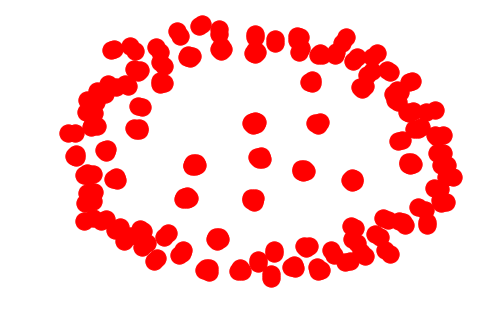

In [9]:
G1_sparse = get_graph_from_year(2006)
nx.draw(G1_sparse, pos=nx.spring_layout(G1_sparse), nodecolor='r',edge_color='b', with_labels=False)

Построим граф для 2009 года

/Users/kugusha/Documents/AOT/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


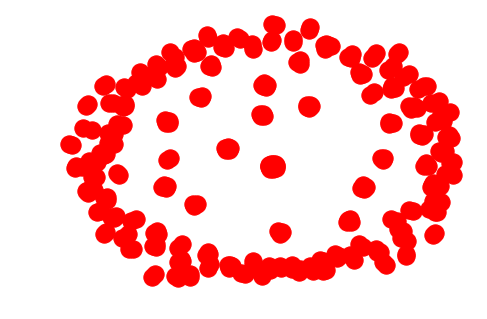

In [10]:
G2_sparse = get_graph_from_year(2009)
nx.draw(G2_sparse, pos=nx.spring_layout(G2_sparse), nodecolor='r',edge_color='b', with_labels=False)

In [11]:
# Соединяем подграфы, пока не наберём больше 50 вершин
def get_connected_graph(G):
    G_connected = nx.Graph()
    for subgraph in nx.connected_component_subgraphs(G):
        if len(G_connected.nodes) > 50:
            break
        if len(G_connected.nodes) > 0:
            G_connected.add_edge(random.choice(list(G_connected.nodes)), random.choice(list(subgraph.nodes))) 
        G_connected.add_edges_from(subgraph.edges)
    return G_connected

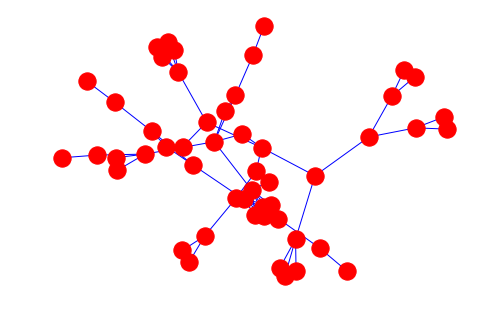

In [12]:
G1 = get_connected_graph(G1_sparse)
nx.draw(G1, pos=nx.spring_layout(G1), nodecolor='r',edge_color='b', with_labels=False)

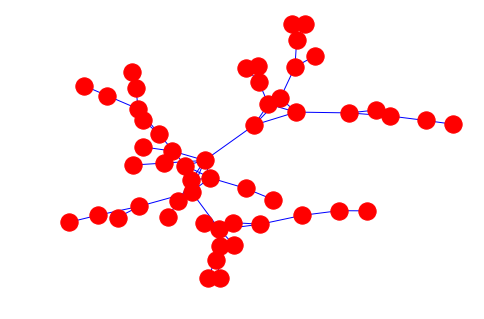

In [13]:
G2 = get_connected_graph(G2_sparse)
nx.draw(G2, pos=nx.spring_layout(G2), nodecolor='r',edge_color='b', with_labels=False)

Проверим графы на связанность, наличине изолированных вершин и петель.

In [14]:
nx.is_connected(G1) and nx.is_connected(G2)

True

In [18]:
print(list(nx.isolates(G1)), list(nx.isolates(G2)))

[] []


In [22]:
print(list(nx.selfloop_edges(G1)), list(nx.selfloop_edges(G2)))

[] []


## Diameter

In [35]:
def bfs(start, G):
    q = []
    d = {}
    mark = {}
    
    q.append(start);
    d[start] = 0;
    mark[start] = 1;

    while (len(q) > 0):
        v = q[0];
        del q[0]
        for neighbor in G.neighbors(v):
            if neighbor not in mark.keys():
                d[neighbor] = d[v] + 1;
                mark[neighbor] = 1;
                q.append(neighbor);
    return max(d.values())

def diameter(G):        
    lengths = []
    counter = 0
    i = 0
    for node in G.nodes():
        lengths.append(bfs(node, G))
    return max(lengths)

D1 = diameter(G1)
D2 = diameter(G2)

In [36]:
print('G1_diameter = {}'.format(D1), '\nG2_diameter = {}'.format(D2))

G1_diameter = 12 
G2_diameter = 12


In [52]:
metrica(D1, D2)

1.0

## Eccentricity

In [40]:
def eccentricity(G):
    eccentricity = {}
    for node in G.nodes:
        eccentricity[node] = bfs(node, G)
    return eccentricity

In [462]:
eccentricity(G1)

{200601020004: 7,
 200601020005: 7,
 200601020006: 7,
 200601030003: 8,
 200601030001: 9,
 200601030002: 9,
 200601040003: 8,
 200601040002: 9,
 200601040004: 9,
 200601080003: 8,
 200601080001: 9,
 200601140004: 10,
 200601140003: 11,
 200601170004: 10,
 200601170003: 11,
 200601180012: 12,
 200601180011: 13,
 200601180013: 13,
 200601180014: 13,
 200601190002: 9,
 200601190009: 10,
 200601190006: 8,
 200601190005: 9,
 200601190007: 9,
 200601200012: 11,
 200601200006: 12,
 200601210009: 10,
 200601210006: 11,
 200601210007: 11,
 200601210008: 11,
 200601210010: 11,
 200601220012: 10,
 200601220013: 11,
 200601220017: 9,
 200601220016: 10,
 200601220018: 10,
 200601230002: 8,
 200601230003: 9,
 200601230004: 8,
 200601230005: 9,
 200601230018: 12,
 200601230019: 13,
 200601240001: 12,
 200601240002: 13,
 200601240003: 10,
 200601240004: 11,
 200601240016: 12,
 200601240013: 13,
 200601240014: 13,
 200601240015: 13,
 200601240017: 13}

In [463]:
eccentricity(G2)

{200901010012: 10,
 200901010013: 10,
 200901010014: 9,
 200901010033: 8,
 200901010032: 7,
 200901010029: 8,
 200901010030: 8,
 200901030032: 10,
 200901030018: 11,
 200901040011: 9,
 200901040010: 10,
 200901090009: 7,
 200901090010: 8,
 200901100010: 9,
 200901100013: 10,
 200901160007: 10,
 200901160008: 11,
 200901160009: 11,
 200901160010: 10,
 200901160011: 11,
 200901160020: 11,
 200901160019: 12,
 200901260007: 12,
 200901260001: 13,
 200901260003: 13,
 200901310009: 9,
 200901310008: 10,
 200901310010: 10,
 200902110018: 10,
 200902110017: 11,
 200902130019: 11,
 200902130003: 12,
 200902220020: 10,
 200902220008: 11,
 200902220009: 11,
 200902220019: 11,
 200902260011: 11,
 200902260003: 12,
 200902260010: 12,
 200903030023: 10,
 200903030022: 11,
 200903150031: 8,
 200903140001: 9,
 200903170019: 12,
 200903170018: 13,
 200903180012: 9,
 200903180011: 10,
 200903180013: 10,
 200903240016: 10,
 200903240015: 11,
 200903250020: 12,
 200903250021: 13,
 200903250022: 13}

## Periphery

In [464]:
def periphery(G):
    d = diameter(G)
    periphery = []
    for item in get_eccentricity(G).items():
        if item[1] == d:
            periphery.append(item[0])
    return periphery

In [465]:
print('G1_periphery = {}'.format(periphery(G1)), '\nG2_periphery = {}'.format(periphery(G2)))

G1_periphery = [200601180011, 200601180013, 200601180014, 200601230019, 200601240002, 200601240013, 200601240014, 200601240015, 200601240017] 
G2_periphery = [200901260001, 200901260003, 200903170018, 200903250021, 200903250022]


## Girth

In [466]:
def girth(G):
    girth = math.inf
    for edge in G.edges:
        G.remove_edge(edge[0], edge[1])
        try:
            distance = nx.shortest_path_length(G, edge[0], edge[1])
            if girth > distance:
                girth = distance + 1
        except:
            pass
        G.add_edge(edge[0], edge[1])
    return girth

In [473]:
print('G1_girth = {}'.format(girth(G1)), '\nG2_girth = {}'.format(girth(G2)))

G1_girth = 3 
G2_girth = 3


## Wiener_index

In [42]:
def Floyd_Warshall(G):
    matrix = nx.adjacency_matrix(G)
    matrix[matrix == 0] = 10**10
    for i in range(matrix.shape[0]):
        matrix[i, i] = 0

    for k in range(matrix.shape[0]):
        for i in range(matrix.shape[0]):
            for j in range(matrix.shape[0]):
                matrix[i, j] = min(matrix[i, j], matrix[i, k] + matrix[k, j])
                
    return matrix

In [43]:
G1_distances = Floyd_Warshall(G1)

/Users/kugusha/Documents/AOT/venv/lib/python3.5/site-packages/scipy/sparse/compressed.py:214: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  ", try using != instead.", SparseEfficiencyWarning)
/Users/kugusha/Documents/AOT/venv/lib/python3.5/site-packages/scipy/sparse/compressed.py:746: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


In [44]:
G2_distances = Floyd_Warshall(G2)

In [45]:
print('G1_wiener_index = {}'.format(G1_distances.sum()), '\nG2_wiener_index = {}'.format(G2_distances.sum()))

G1_wiener_index = 14058 
G2_wiener_index = 14358


In [53]:
metrica(G1_distances.sum(), G2_distances.sum())

0.9894425675675675